### Baseball Project

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
baseball = pd.read_csv('Baseball.csv')

In [3]:
#check the top five rows
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# checking the sull values
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

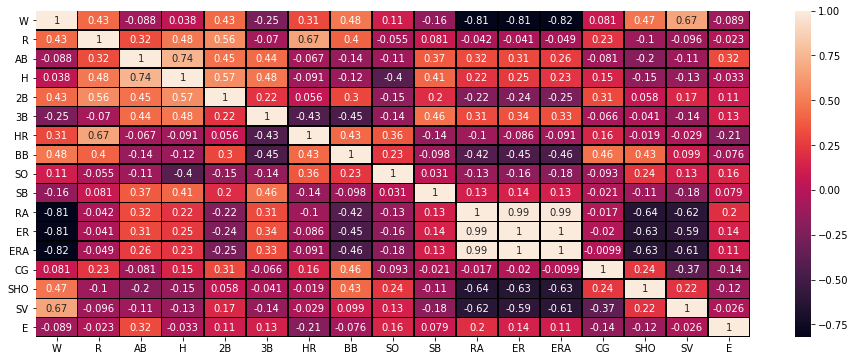

In [5]:
# Plotting the correation matrix using heatmap 
plt.figure(figsize=(16, 6))
sns.heatmap(baseball.corr(), linewidths = .5, linecolor = 'black', annot = True)

In [6]:
# Dropping one of two features that have a correlation higher than 0.9
df = baseball.drop(['RA','ER'], axis = 1)

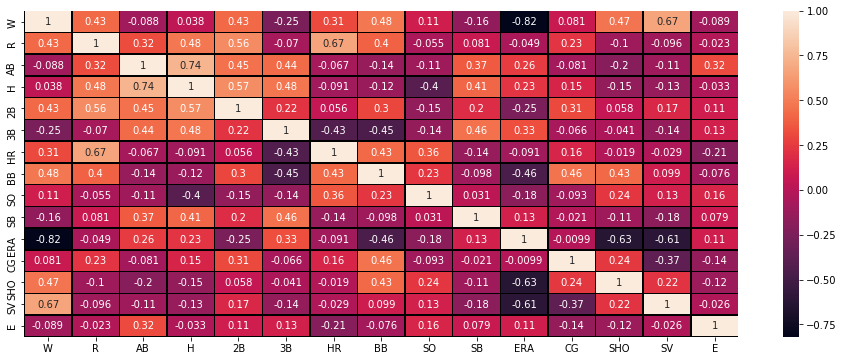

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), linewidths = .5, linecolor = 'black', annot = True)

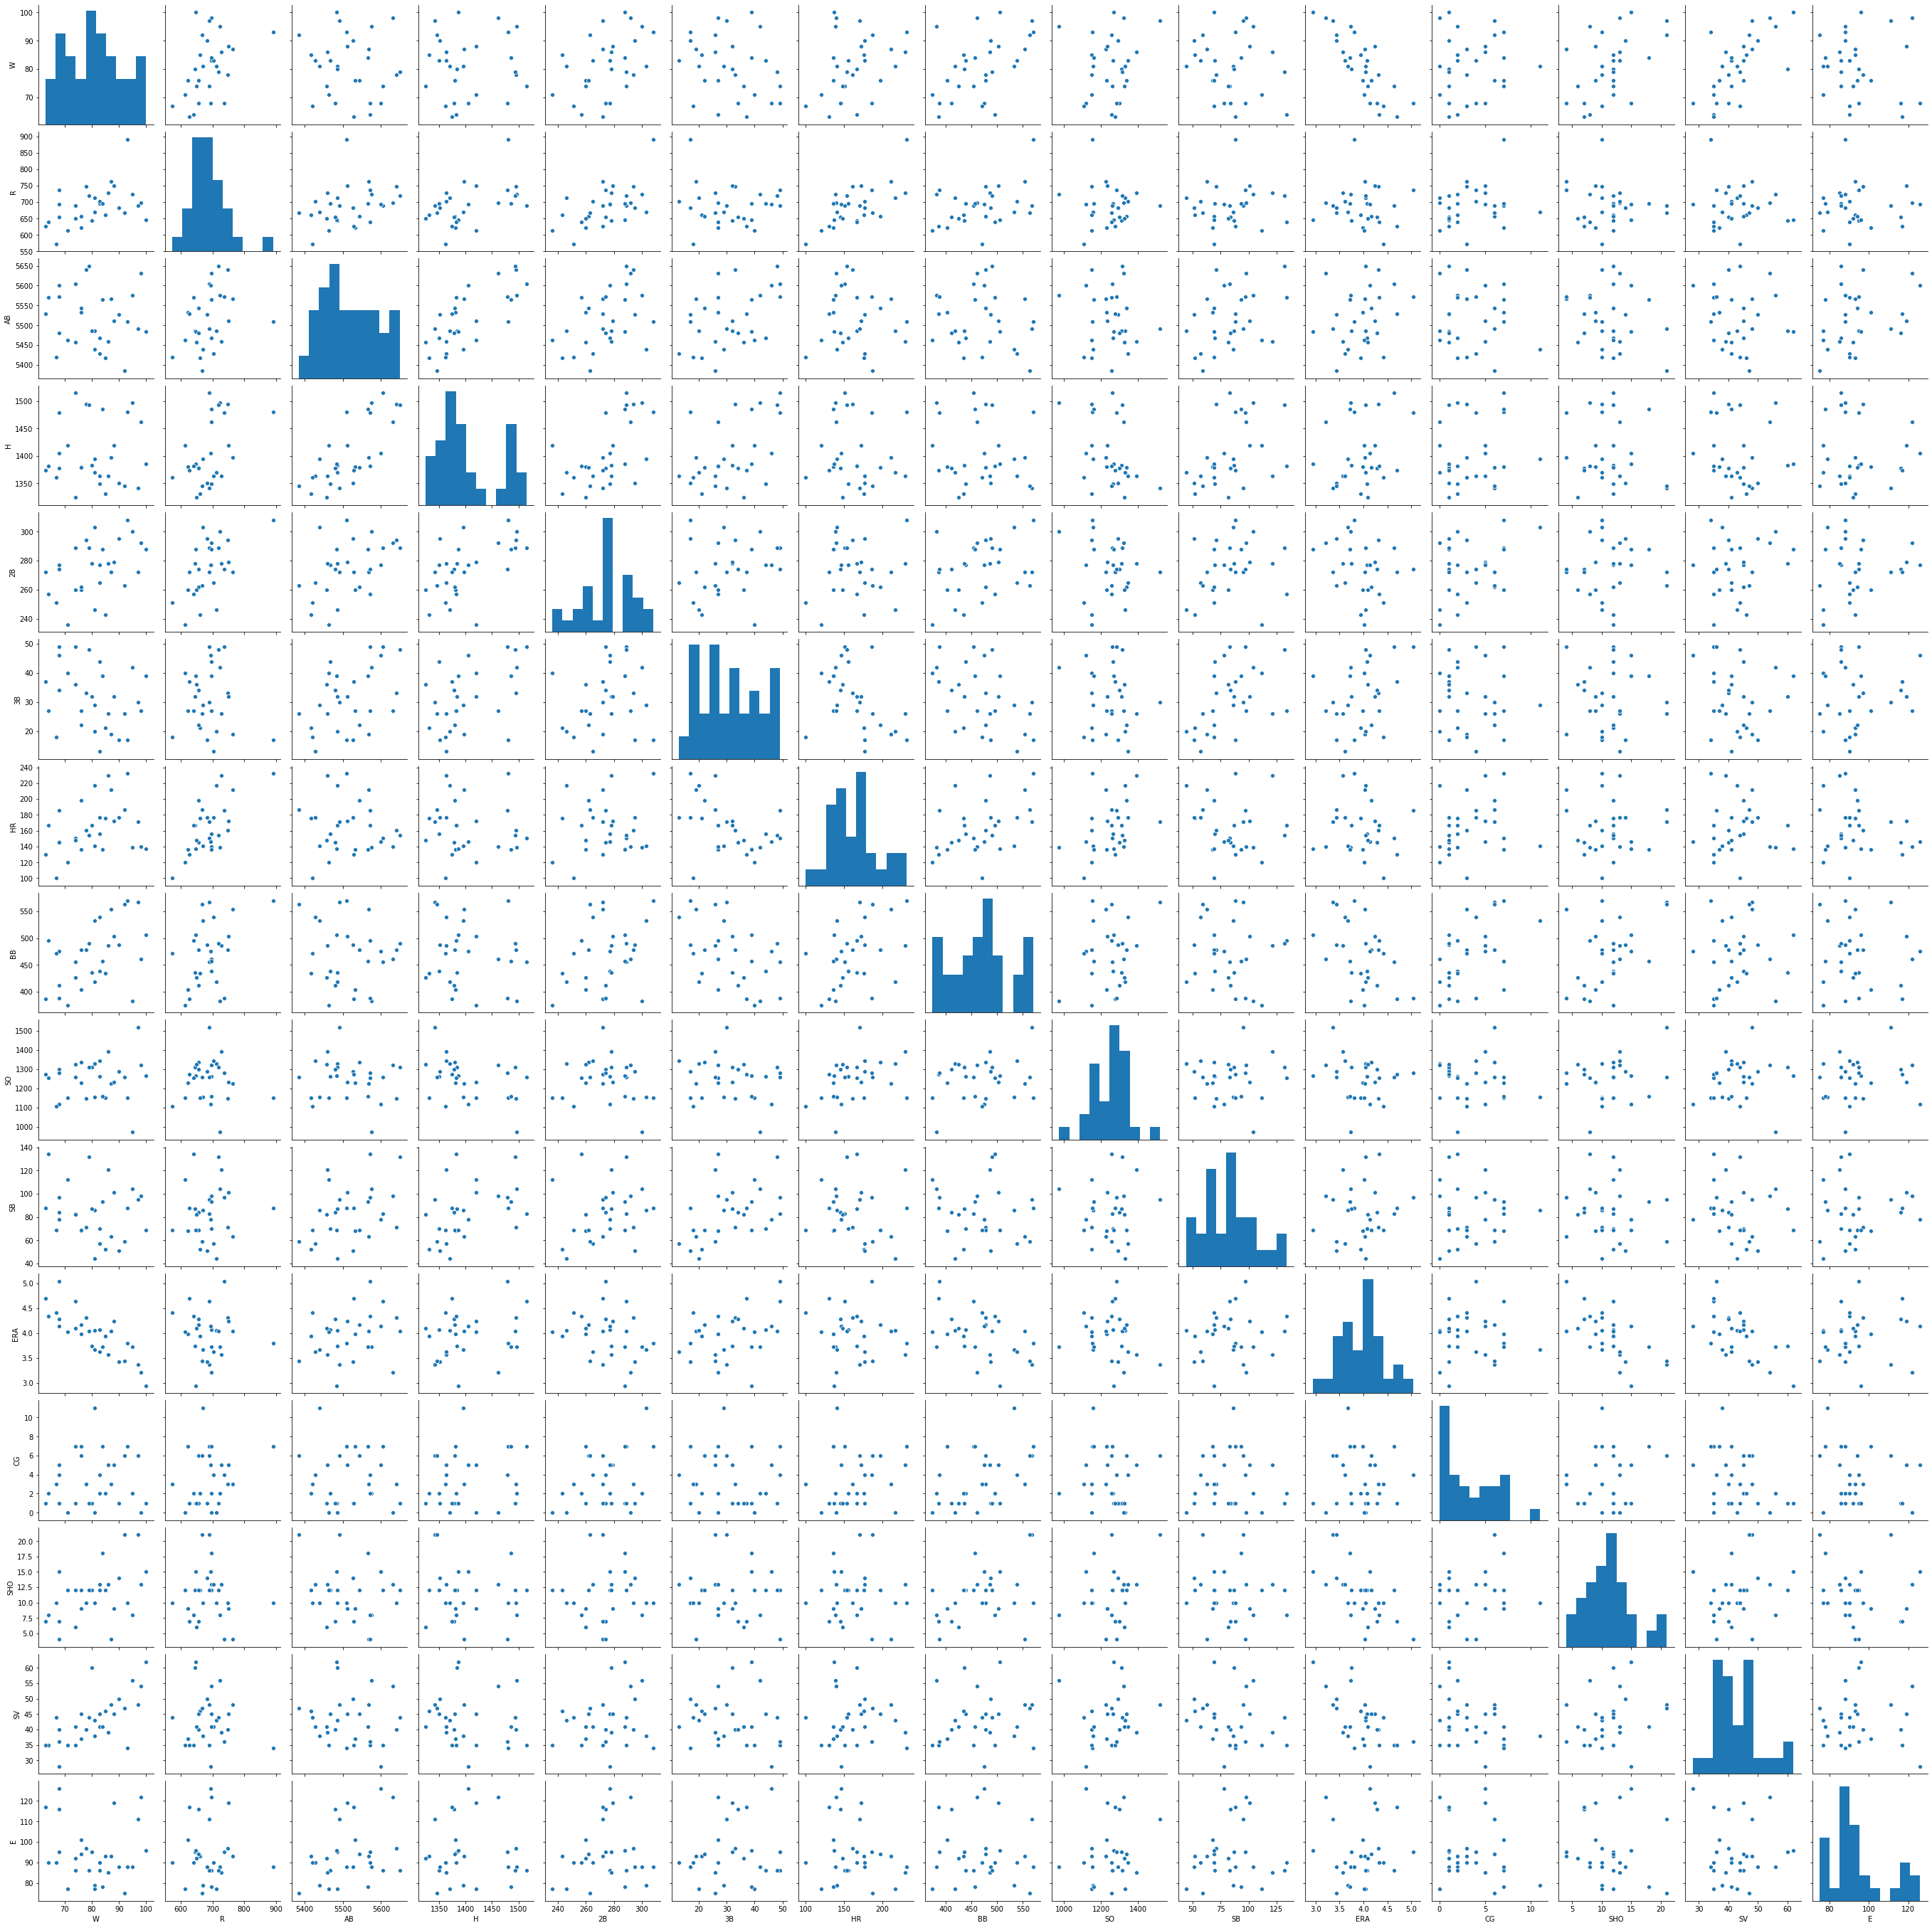

In [8]:
sns.pairplot(kind= 'scatter',data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7D7420C48>,
      dtype=object)

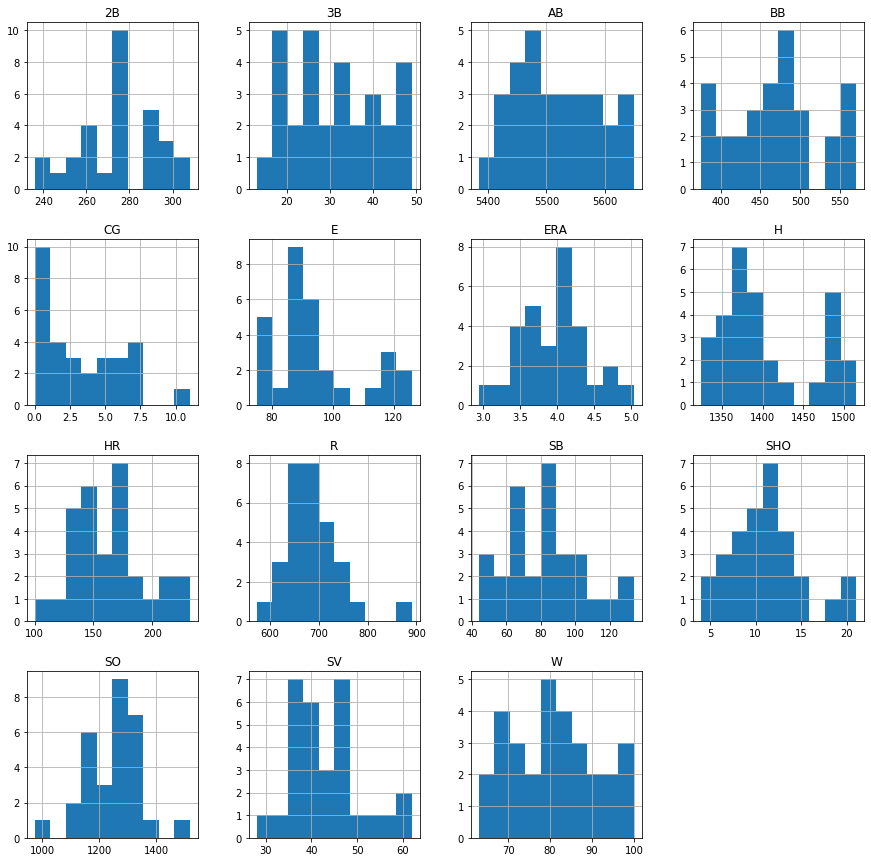

In [9]:
df.hist(figsize=(15,15))

In [10]:
df.shape

(30, 15)

In [11]:
# Removing the ouliers using zscore 
from scipy import stats
newdf=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
newdf.shape

(29, 15)

In [13]:
# checking the skewness in the newdf
newdf.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [14]:
newdf.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [15]:
# splitting the input and target variables in x and y

In [16]:
y = newdf.iloc[:,:1]

In [17]:
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [18]:
x = newdf.iloc[:,1:]

In [19]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=75)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (23, 14)
Shape of y_train =  (23, 1)
Shape of X_test =  (6, 14)
Shape of y_test =  (6, 1)


In [105]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(x_train)
x_train= ms.transform(x_train)
x_test= ms.transform(x_test)

In [106]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to r_state ",final_r_state," is ",max_r_score)
    return final_r_state

In [107]:
# Checking the best random state for max R2 score
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

max r2 score corresponding to r_state  47  is  0.9330638989544985


In [108]:
#Lets check lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [109]:
#Lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

max r2 score corresponding to r_state  75  is  0.9443022883644859


In [90]:
#Lets check max r2 score when we use Ridge
Rsreg=Ridge(alpha=0.1)
r_state=maxr2_score(Rsreg,x,y)

max r2 score corresponding to  75  is  0.9381667776028454


In [91]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
knr=KNeighborsRegressor()
neighbors={"n_neighbors":range(1,26)}
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 4}

In [92]:
dtr =DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

max r2 score corresponding to  65  is  0.8288614938361132


In [93]:
adr =AdaBoostRegressor()
r_state=maxr2_score(adr,x,y)

max r2 score corresponding to  48  is  0.786100216955941


In [94]:
rdfr = RandomForestRegressor()
r_state=maxr2_score(rdfr,x,y)

max r2 score corresponding to  94  is  0.7665014842300555


In [95]:
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 )
r_state=maxr2_score(gbr,x,y)

max r2 score corresponding to  94  is  0.6227435280107962


In [96]:
xgr =XGBRegressor()
r_state=maxr2_score(xgr,x,y)

max r2 score corresponding to  61  is  0.7144472271863176


In [98]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [117]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=0.1 , random_state= 75)
RI=Ridge(alpha=0.1 , random_state= 75)
EN=ElasticNet(alpha=0.1 , random_state= 75)
KNR=KNeighborsRegressor(n_neighbors= 4)
DTR=DecisionTreeRegressor(random_state= 65)
ABR=AdaBoostRegressor(random_state= 95)
RFR=RandomForestRegressor(random_state= 54)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=65)
XGR=XGBRegressor(random_state = 61)

In [118]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [122]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y).mean()    
    cvs.append(round(score,3))

In [123]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.859558,18.979,0.415
1,Lasso,0.952583,6.408,0.549
2,Ridge,0.940084,8.097,0.476
3,ElasticNet,0.778469,29.937,0.175
4,DecisionTreeRegressor,0.700308,40.500,-2.585
5,KNeighborsRegressor,0.687975,42.167,-0.161
6,AdaBoostRegressor,0.659335,46.037,-0.920
7,RandomForestRegressor,0.647140,47.685,-0.543
8,GradientBoostingRegressor,0.402504,80.745,-0.686
9,XGBRegressor,0.572870,57.722,-0.939


In [131]:
# As we can see from above trials the best performance is given by Lasso so it is the final model selected

In [132]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(LA,'BaseBall.pkl')

['BaseBall.pkl']